In [1]:
import pandas as pd

loan_df = pd.read_csv('/content/Task 3 and 4_Loan_Data (1).csv')
loan_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split the data
X = loan_df.drop(['default', 'customer_id'], axis=1)
y = loan_df['default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

probabilities = log_reg.predict_proba(X_test)[:, 1]
probabilities

array([8.15545694e-08, 1.06529581e-02, 9.99999943e-01, ...,
       7.32718031e-09, 8.01509402e-08, 8.29406929e-08])

<function matplotlib.pyplot.show(close=None, block=None)>

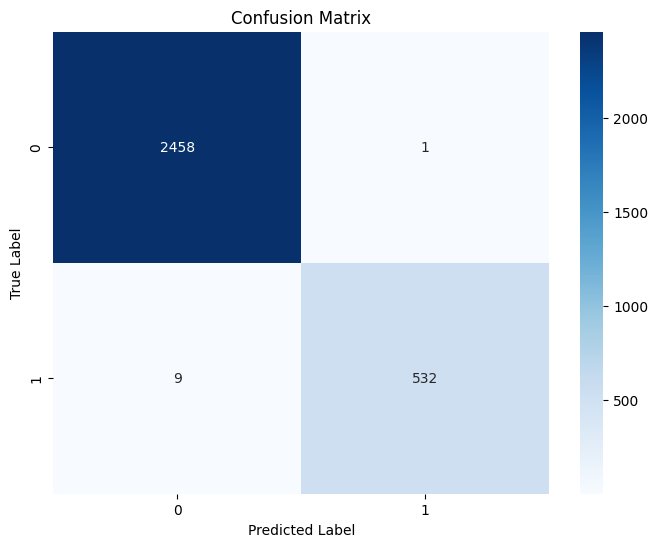

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [5]:
feature_names = X.columns

coefficients = log_reg.coef_[0]

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,credit_lines_outstanding,8.356153
2,total_debt_outstanding,3.898041
1,loan_amt_outstanding,0.170021
5,fico_score,-1.179639
3,income,-2.469290
4,years_employed,-2.730278


In [8]:
def calculate_expected_loss(model, scaler, features, recovery_rate=0.1):

  features_scaled = scaler.transform([features])

  probability_of_default = model.predict_proba(features_scaled)[:, 1][0]

  LGD = 1 - recovery_rate
  EAD = features[1]
  expected_loss = EAD * probability_of_default * LGD

  return expected_loss

# test
borrower_features = [5, 1878.938226, 7468.752520, 56332.46945, 4, 462]

borrower_expected_loss = calculate_expected_loss(log_reg, scaler, borrower_features)
borrower_expected_loss

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1690.8657376430722